In [72]:
import re
import requests
from bs4 import BeautifulSoup as bs
import numpy as np

In [73]:
import lxml
import time

In [74]:
import pandas as pd

In [75]:
data=pd.read_csv('Argenprop.csv',encoding='utf-8')
data['bedrooms'] = data['bedrooms'].replace('Monoambiente',0)
data

,currencyPurchase,pricePurchase,expensesCurrency,expensesPrice,direcction,coveredArea,bedrooms,antiquity,toilets,environments,garages,condition,provision
0,USD,420.000,$,32.000,REPUBLICA DE LA INDIA 2900,90,2,15,2,3,1,Excelente,Contrafrente
1,USD,305.000,$,60.000,AV. SANTA FE 3300,165,4,10000,4,5,1,Excelente,Frente
2,USD,220.000,$,29.000,LAFINUR 2900,85,2,10000,2,3,0,Excelente,Contrafrente
3,USD,555.000,$,48.000,REPUBLICA DE LA INDIA 2900,130,3,15,3,4,1,Excelente,Frente
4,USD,87.000,$,8.000,Republica de la India 2800,35,1,10000,1,2,0,Excelente,Contrafrente
5,USD,230.000,$,9.000,JUAN MARIA GUTIERREZ 3800,95,2,10000,2,3,0,Excelente,Frente
6,USD,340.000,$,22.000,Charcas 4000,75,2,10000,2,3,1,Excelente,Contrafrente
7,USD,103.000,$,7.000,REPUBLICA DE LA INDIA 2800,35,1,10000,1,2,0,Excelente,Frente
8,USD,327.000,$,32.000,PARAGUAY 5600,115,2,14,2,3,1,Excelente,Frente
9,USD,330.000,$,15.000,Scalabrini Ortiz 1500,106,3,10000,3,4,2,Excelente,Frente


In [76]:
data_2=data

In [77]:
#pip install seaborn

In [78]:
import seaborn as sns

<AxesSubplot: >

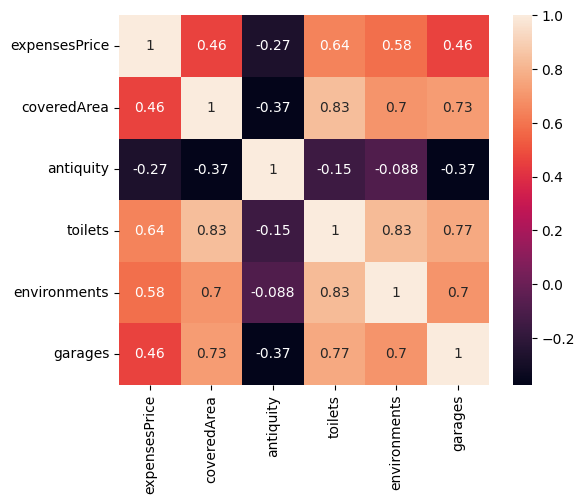

In [79]:
sns.heatmap(data.corr(), square=True, annot=True)

In [80]:
#se puede apreciar relaciones significativas entre:
    #-toilets-coveredArea
    #-garages-coveredArea
    #-enviroments-covered area
    #-toilets-enviroments

In [81]:
from matplotlib import pyplot as plt
import seaborn as sns

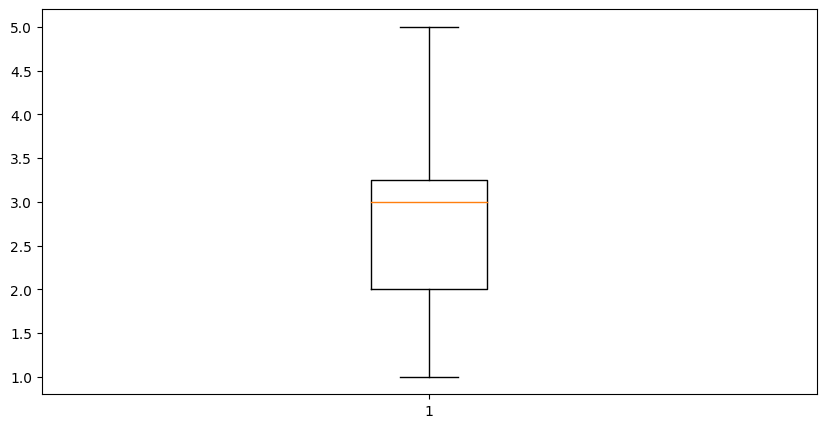

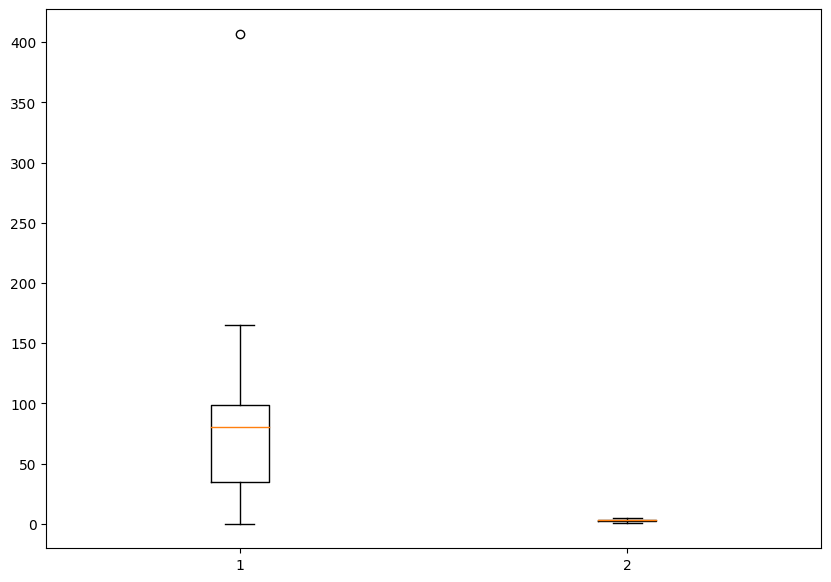

In [83]:
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot([data['coveredArea'],data['environments']]) 
plt.show() 

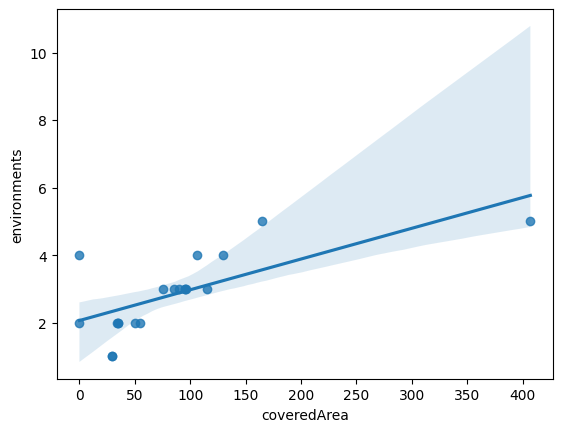

In [84]:
sns.regplot(x = data['coveredArea'], y = data['environments'], data=data )
plt.xlabel('coveredArea')
plt.ylabel('environments')
plt.show()

In [82]:
data

,currencyPurchase,pricePurchase,expensesCurrency,expensesPrice,direcction,coveredArea,bedrooms,antiquity,toilets,environments,garages,condition,provision
0,USD,420.000,$,32.000,REPUBLICA DE LA INDIA 2900,90,2,15,2,3,1,Excelente,Contrafrente
1,USD,305.000,$,60.000,AV. SANTA FE 3300,165,4,10000,4,5,1,Excelente,Frente
2,USD,220.000,$,29.000,LAFINUR 2900,85,2,10000,2,3,0,Excelente,Contrafrente
3,USD,555.000,$,48.000,REPUBLICA DE LA INDIA 2900,130,3,15,3,4,1,Excelente,Frente
4,USD,87.000,$,8.000,Republica de la India 2800,35,1,10000,1,2,0,Excelente,Contrafrente
5,USD,230.000,$,9.000,JUAN MARIA GUTIERREZ 3800,95,2,10000,2,3,0,Excelente,Frente
6,USD,340.000,$,22.000,Charcas 4000,75,2,10000,2,3,1,Excelente,Contrafrente
7,USD,103.000,$,7.000,REPUBLICA DE LA INDIA 2800,35,1,10000,1,2,0,Excelente,Frente
8,USD,327.000,$,32.000,PARAGUAY 5600,115,2,14,2,3,1,Excelente,Frente
9,USD,330.000,$,15.000,Scalabrini Ortiz 1500,106,3,10000,3,4,2,Excelente,Frente


In [85]:
#se puede apreciar que hay conjuntos de puntos fuera de rango [coveredArea,environments]={ [400,4] [0,4]}

In [86]:
# Funcion ejemplo para detección de outliers
def find_anomalies(data):
    anomalies = []
    # Set upper and lower limit to 2 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 2
    lower_limit = data_mean - anomaly_cut_off
    upper_limit = data_mean + anomaly_cut_off
    #################print(lower_limit.iloc[0])
    #################print(upper_limit.iloc[0])
    # Generate outliers
    for index, row in data.iterrows():
        outlier = row # # obtener primer columna
        # print(outlier)
        if ( (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]) ) :
            anomalies.append(index)
    return anomalies
x=find_anomalies(data.set_index('direcction')[['coveredArea']])[0]
print(f'el departamento con direccion : {x} ,posee anomalias en coveredArea')

el departamento con direccion : Castex 3500 ,posee anomalias en coveredArea


In [87]:
data.head()

,currencyPurchase,pricePurchase,expensesCurrency,expensesPrice,direcction,coveredArea,bedrooms,antiquity,toilets,environments,garages,condition,provision
0,USD,420.000,$,32.0,REPUBLICA DE LA INDIA 2900,90,2,15,2,3,1,Excelente,Contrafrente
1,USD,305.000,$,60.0,AV. SANTA FE 3300,165,4,10000,4,5,1,Excelente,Frente
2,USD,220.000,$,29.0,LAFINUR 2900,85,2,10000,2,3,0,Excelente,Contrafrente
3,USD,555.000,$,48.0,REPUBLICA DE LA INDIA 2900,130,3,15,3,4,1,Excelente,Frente
4,USD,87.000,$,8.0,Republica de la India 2800,35,1,10000,1,2,0,Excelente,Contrafrente


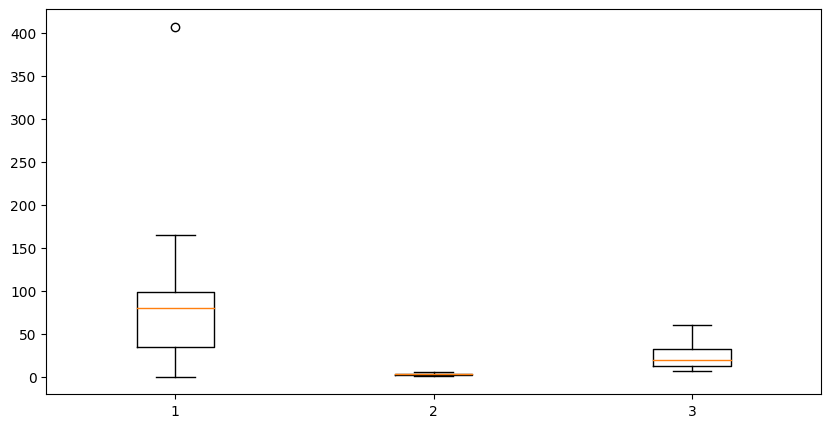

In [102]:
fig = plt.figure(figsize =(10, 5)) 
#plt.boxplot([data['pricePurchase'],data['expensesPrice'],data['coveredArea'],data['bedrooms'],data['toilets'],data['environments']]) 
#plt.boxplot([data['pricePurchase'],data['expensesPrice'],data['coveredArea']]) 
plt.boxplot([data['coveredArea'],data['environments'],data['expensesPrice']]) 

plt.show() 

In [90]:
corr_matrix = data.corr(method='pearson')
corr_matrix
#corr_matrix = sns.heatmap(data.corr(), square=True, annot=True)
#corr_matrix
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(8)

,expensesPrice,coveredArea,antiquity,toilets,environments,garages
expensesPrice,1.000000,0.461017,-0.268813,0.640478,0.582431,0.461783
coveredArea,0.461017,1.000000,-0.368481,0.833958,0.698052,0.725313
antiquity,-0.268813,-0.368481,1.000000,-0.153806,-0.088287,-0.374904
toilets,0.640478,0.833958,-0.153806,1.000000,0.826018,0.767247
environments,0.582431,0.698052,-0.088287,0.826018,1.000000,0.698237
garages,0.461783,0.725313,-0.374904,0.767247,0.698237,1.000000


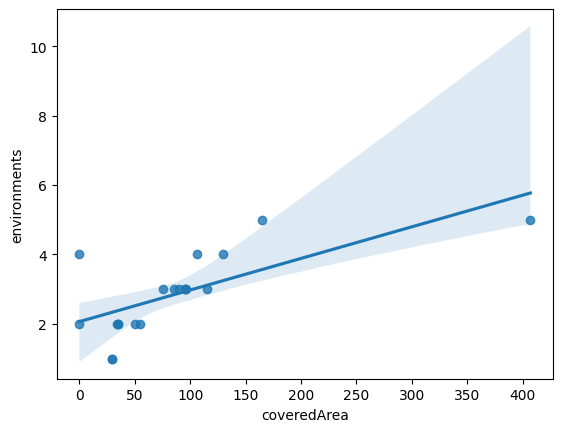

In [89]:
sns.regplot(x = data['coveredArea'], y = data['environments'], data=data )
plt.xlabel('coveredArea')
plt.ylabel('environments')
plt.show()

,variable_1,variable_2,r,abs_r
19,toilets,coveredArea,0.833958,0.833958
9,coveredArea,toilets,0.833958,0.833958
27,environments,toilets,0.826018,0.826018
22,toilets,environments,0.826018,0.826018
33,garages,toilets,0.767247,0.767247
23,toilets,garages,0.767247,0.767247
31,garages,coveredArea,0.725313,0.725313
11,coveredArea,garages,0.725313,0.725313
